<a href="https://colab.research.google.com/github/abdelfatah2000/ML-Projects/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#Load Datasets

In [2]:
mat = pd.read_csv('/content/student-mat.csv', sep=';')
por = pd.read_csv('/content/student-por.csv', sep=';')

In [3]:
mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [4]:
por.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

#Data Preparation

In [5]:
# Merage two datasets
train_data = pd.concat([mat, por])

In [6]:
train_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [7]:
train_data.shape

(1044, 33)

In [8]:
# Rename the columns
train_data.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

Add Final Grade column which convert final score to categorical data

In [9]:
train_data.loc[(train_data.final_score >=0) & (train_data.final_score <=9), 'final_grade'] = 'fail'
train_data.loc[(train_data.final_score >=10) &(train_data.final_score <=20), 'final_grade'] = 'pass'

In [10]:
train_data.head()

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,fail
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,fail
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,pass
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,pass
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,pass


In [11]:
train_data.isnull().any()

school                   False
sex                      False
age                      False
address                  False
family_size              False
parents_status           False
mother_education         False
father_education         False
mother_job               False
father_job               False
reason                   False
guardian                 False
commute_time             False
study_time               False
failures                 False
school_support           False
family_support           False
paid_classes             False
activities               False
nursery                  False
desire_higher_edu        False
internet                 False
romantic                 False
family_quality           False
free_time                False
go_out                   False
weekday_alcohol_usage    False
weekend_alcohol_usage    False
health                   False
absences                 False
period1_score            False
period2_score            False
final_sc

#EDA

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Student')

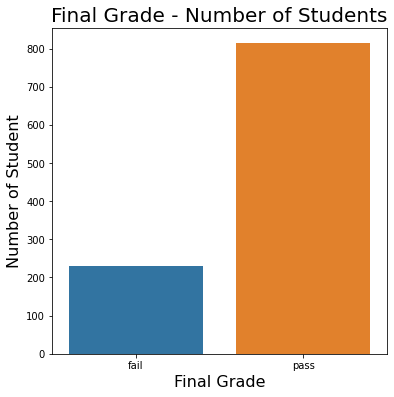

In [12]:
plt.figure(figsize=(6, 6))
sns.countplot('final_grade', data=train_data)
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

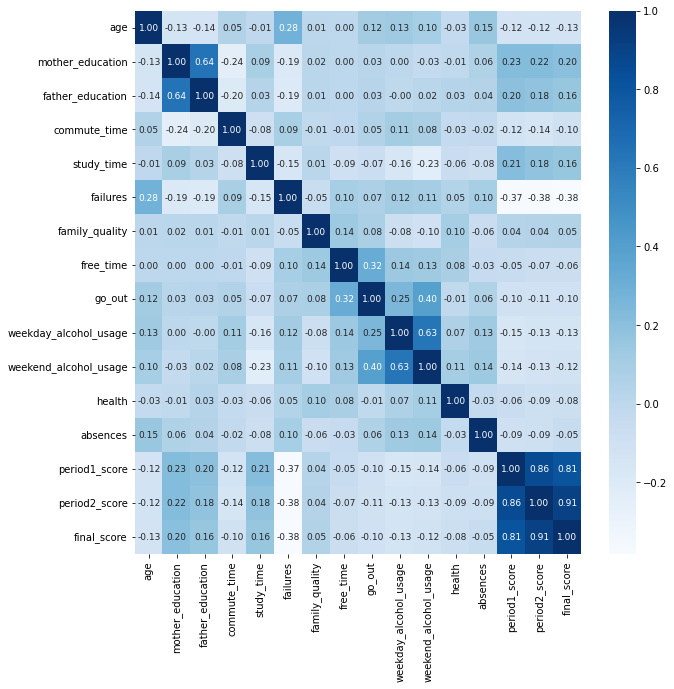

In [13]:
correlation = train_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cbar=True, annot_kws={'size':9}, cmap="Blues", fmt=".2f")

See how students in a romantic relationship vs. those not in a relationship perform

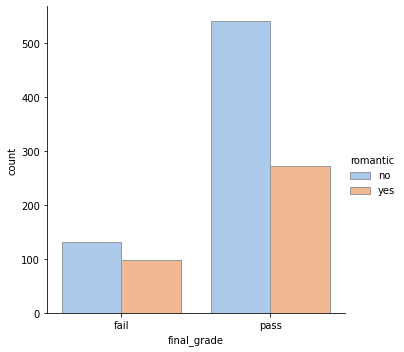

In [14]:
sns.catplot(
    data=train_data, x="final_grade", hue="romantic", kind="count",
    palette="pastel", edgecolor=".6",
)


In [15]:
# living area: urban vs. rural
train_data.address = train_data.address.map({'U':'Urban', 'R':'Rural'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


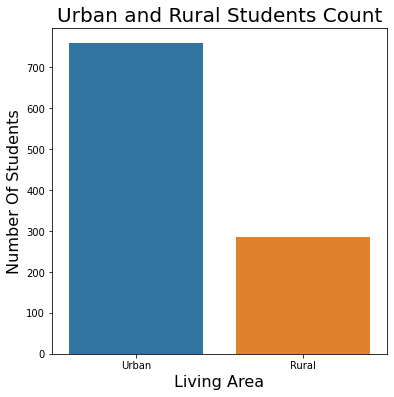

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(train_data.address)
plt.title('Urban and Rural Students Count', fontsize=20)
plt.xlabel('Living Area', fontsize=16)
plt.ylabel('Number Of Students', fontsize=16)
plt.show()

In [17]:
# Change categorical variables to numerical
train_data['school'] = train_data['school'].map({'GP': 0, 'MS': 1})
train_data['sex'] = train_data['sex'].map({'M': 0, 'F': 1})
train_data['address'] = train_data['address'].map({'Urban': 0, 'Rural': 1})
train_data['family_size'] = train_data['family_size'].map({'LE3': 0, 'GT3': 1})
train_data['parents_status'] = train_data['parents_status'].map({'T': 0, 'A': 1})
train_data['mother_job'] = train_data['mother_job'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
train_data['father_job'] = train_data['father_job'].map({'teacher': 0, 'health': 1, 'services': 2, 'at_home': 3, 'other': 4})
train_data['reason'] = train_data['reason'].map({'home': 0, 'reputation': 1, 'course': 2, 'other': 3})
train_data['guardian'] = train_data['guardian'].map({'mother': 0, 'father': 1, 'other': 3})
train_data['school_support'] = train_data['school_support'].map({'no': 0, 'yes': 1})
train_data['family_support'] = train_data['family_support'].map({'no': 0, 'yes': 1})
train_data['paid_classes'] = train_data['paid_classes'].map({'no': 0, 'yes': 1})
train_data['activities'] = train_data['activities'].map({'no': 0, 'yes': 1})
train_data['nursery'] = train_data['nursery'].map({'no': 0, 'yes': 1})
train_data['desire_higher_edu'] = train_data['desire_higher_edu'].map({'no': 0, 'yes': 1})
train_data['internet'] = train_data['internet'].map({'no': 0, 'yes': 1})
train_data['romantic'] = train_data['romantic'].map({'no': 0, 'yes': 1})
train_data['final_grade'] = train_data['final_grade'].map({'fail': 0, 'pass': 1})

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   school                 1044 non-null   int64
 1   sex                    1044 non-null   int64
 2   age                    1044 non-null   int64
 3   address                1044 non-null   int64
 4   family_size            1044 non-null   int64
 5   parents_status         1044 non-null   int64
 6   mother_education       1044 non-null   int64
 7   father_education       1044 non-null   int64
 8   mother_job             1044 non-null   int64
 9   father_job             1044 non-null   int64
 10  reason                 1044 non-null   int64
 11  guardian               1044 non-null   int64
 12  commute_time           1044 non-null   int64
 13  study_time             1044 non-null   int64
 14  failures               1044 non-null   int64
 15  school_support         1044 non-null   

In [19]:
X = train_data.drop(['final_grade'], axis=1)
Y = train_data['final_grade']
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [21]:
X_pred = model.predict(X_train)
training_accuracy = accuracy_score(X_pred, y_train)

In [22]:
print('Accuracy Training Data : ' , training_accuracy)

Accuracy Training Data :  0.9972602739726028


In [23]:
y_pred = model.predict(X_test)
testing_accuracy = accuracy_score(y_pred, y_test)

In [24]:
print('Accuracy Testing Data : ' , testing_accuracy)

Accuracy Testing Data :  0.9745222929936306


In [25]:
df = pd.DataFrame({'Actual' :y_test, 'Predicted': y_pred})
df.head(15)

,Actual,Predicted
576,1,1
280,0,0
141,1,1
429,1,1
249,1,1
382,1,1
583,0,0
231,1,1
265,1,1
153,1,1
